# Customer Segmentation 

Welcome to this project! We will be analyzing a customer transaction dataset in order to investigate and interpret customer behaviour of a certain supplier.

We will be doing exploratory data analysis on our data, before employing a variety of dimensionality reduction techniques. We will visualize our new representation, before clustering our customers based on their behaviour. Finally, we will visualize our clusters in an interactive way to analyze them and their differences more thoroughly.



## Project Outline
Introduction (this section)

Exploratory Data Analysis

Principal Component Analysis

Kernel Principal Component Analysis

K-Means Clustering with Elbow Method

Interactive Cluster Analysis



#Introduction
[This is the dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) we will be using. It is collated by Margarida G. M. S. Cardoso, and comprises annual spending across different types of retail products (for example, Frozen, Grocery, Delicatessen, etc.). We will use unsupervised methods to reduce the dimensionality of this data, and plot the resulting 2-D data, and investigate what our models are learning.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

In [3]:
customers_df = pd.read_csv("/content/drive/MyDrive/customer segmentation/Wholesale customers data.csv")
customers_df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
customers_df = customers_df.rename(columns = {'Delicassen' : 'Delicatessen'})
customers_df['Channel'] = customers_df['Channel'].map({1:"HoReCa", 2: 'Retail'})
customers_df['Region'] = customers_df['Region'].map({1:'Lisbon', 2 : 'Porto', 3: 'Other'})
customers_df.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  Retail  Other  12669  9656     7561     214              2674          1338
1  Retail  Other   7057  9810     9568    1762              3293          1776
2  Retail  Other   6353  8808     7684    2405              3516          7844
3  HoReCa  Other  13265  1196     4221    6404               507          1788
4  Retail  Other  22615  5410     7198    3915              1777          5185

In [5]:
customers_df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [6]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen']

In [7]:
customers_df[features].describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

# Exploratory Data Analysis


In [8]:
customers_df.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  Retail  Other  12669  9656     7561     214              2674          1338
1  Retail  Other   7057  9810     9568    1762              3293          1776
2  Retail  Other   6353  8808     7684    2405              3516          7844
3  HoReCa  Other  13265  1196     4221    6404               507          1788
4  Retail  Other  22615  5410     7198    3915              1777          5185

In [9]:
#Categorical feature analysis

In [10]:
customers_df['Region'].value_counts()

Other     316
Lisbon     77
Porto      47
Name: Region, dtype: int64

In [11]:
customers_df['Channel'].value_counts()

HoReCa    298
Retail    142
Name: Channel, dtype: int64

In [12]:
features = customers_df.columns.tolist()

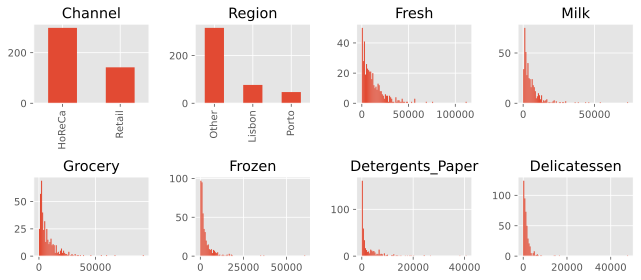

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(9,4))

for feature, ax in zip(features, axes.ravel()):
  if (feature =='Channel') or (feature=='Region'):
    customers_df[feature].value_counts().plot.bar(ax = ax)
  else:
    ax.hist(customers_df[feature], bins = 100)
  ax.set_title(feature)
plt.tight_layout()

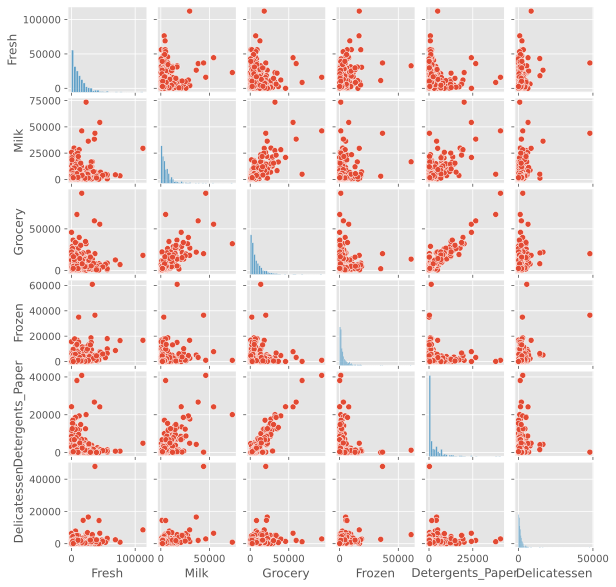

In [14]:
pplot = sns.pairplot(customers_df, vars = features[2:])
pplot.fig.set_size_inches(8,8)
##No true correlations between variables 

# Principal Component Analysis

In [15]:
#We need to standardize(normalize) our features data so that the PCA model is bot bias 
#since the standard deviation of eacch feature varies largely

In [16]:
data = customers_df[features[2:]].to_numpy()
print(data.shape)
scaler = StandardScaler()

(440, 6)


In [17]:
data = scaler.fit_transform(data)
data[:,0].std()

1.0

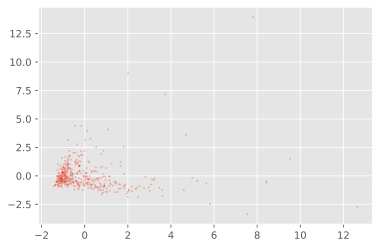

In [18]:
pca = PCA(n_components=2)
res_pca = pca.fit_transform(data)
plt.scatter(res_pca[:, 0], res_pca[:, 1], s=2, alpha = 0.3)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


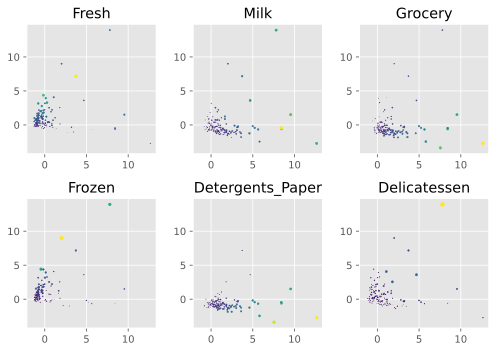

In [19]:
fig, axes = plt.subplots(2, 3, figsize =(7,5))

for feature, ax in zip(features[2:], axes.ravel()):
  cmap = 'viridis'
  sizes = data[:,(features.index(feature)-2)]
  cols = customers_df[feature] 
  ax.scatter(res_pca[:,0], res_pca[:, 1], s = sizes,c=cols, cmap = cmap)
  ax.set_title(feature)

plt.tight_layout()

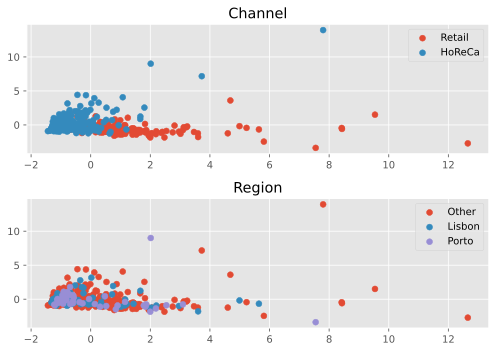

In [20]:
#PCA for categorical data

fig, axes = plt.subplots(2,1, figsize=(7,5))

for feature, ax in zip(features[:2], axes.ravel()):
  cmap = 'Pastel1'
  sizes = 20
  for unique_val in customers_df[feature].unique():
    ax.scatter(
        res_pca[customers_df[feature]==unique_val, 0],
        res_pca[customers_df[feature]==unique_val, 1],
        label = unique_val

    )
    ax.set_title(feature)
    ax.legend()

plt.tight_layout()

In [21]:
#According to PCA there is no real difference of which region it's coming from


Let's use Kernel PCA, to see if it is better than PCA

In [22]:
#Polynomial Function

In [23]:
kpca = KernelPCA(n_components = 2, kernel = 'poly', degree = 2)

res_kpca_poly = kpca.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


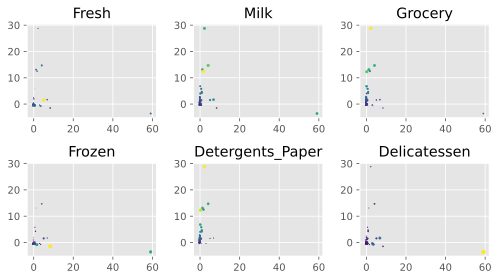

In [24]:
fig, axes = plt.subplots(2, 3, figsize =(7,4))

for feature, ax in zip(features[2:], axes.ravel()):
  cmap = 'viridis'
  sizes = data[:,(features.index(feature)-2)]
  cols = customers_df[feature] 
  ax.scatter(res_kpca_poly[:,0], res_kpca_poly[:, 1], s = sizes,c=cols, cmap = cmap)
  ax.set_title(feature)

plt.tight_layout()

In [25]:
#Everything is still clustered together, Let's try the Radial Basis Function

## Radial Basis Function

In [26]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf', degree = 2)

res_kpca_rbf = kpca.fit_transform(data)

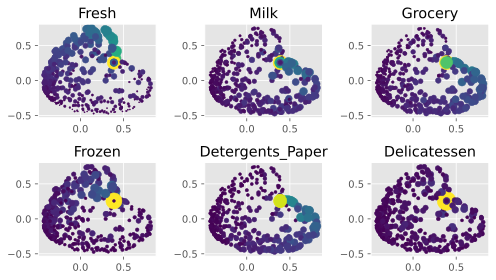

In [27]:
fig, axes = plt.subplots(2, 3, figsize =(7,4))

for feature, ax in zip(features[2:], axes.ravel()):
  cmap = 'viridis'
  sizes = 20+20*data[:,(features.index(feature)-2)]
  cols = customers_df[feature] 
  ax.scatter(res_kpca_rbf[:,0], res_kpca_rbf[:, 1], s = sizes,c=cols, cmap = cmap)
  ax.set_title(feature)

plt.tight_layout()

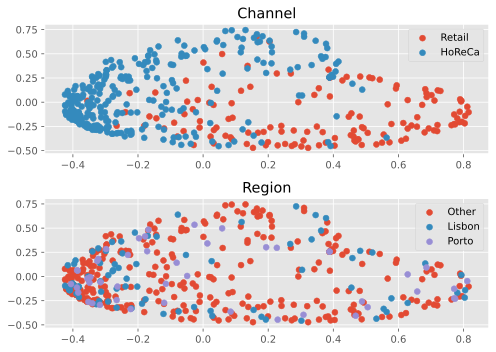

In [28]:
fig, axes = plt.subplots(2,1, figsize=(7,5))

for feature, ax in zip(features[:2], axes.ravel()):
  cmap = 'Pastel1'
  sizes = 20
  for unique_val in customers_df[feature].unique():
    ax.scatter(
        res_kpca_rbf[customers_df[feature]==unique_val, 0],
        res_kpca_rbf[customers_df[feature]==unique_val, 1],
        label = unique_val

    )
    ax.set_title(feature)
    ax.legend()

plt.tight_layout()

## Cosine Function

In [29]:
kpca = KernelPCA(n_components = 2, kernel = 'cosine')

res_kpca_cos = kpca.fit_transform(data)

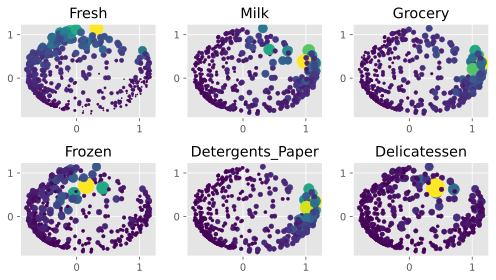

In [30]:
fig, axes = plt.subplots(2, 3, figsize =(7,4))

for feature, ax in zip(features[2:], axes.ravel()):
  cmap = 'viridis'
  sizes = 20+20*data[:,(features.index(feature)-2)]
  cols = customers_df[feature] 
  ax.scatter(res_kpca_cos[:,0], res_kpca_cos[:, 1], s = sizes,c=cols, cmap = cmap)
  ax.set_title(feature)

plt.tight_layout()

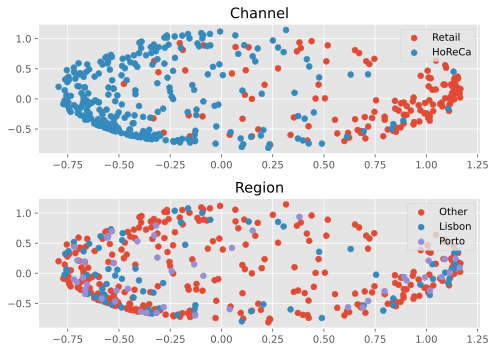

In [31]:
fig, axes = plt.subplots(2,1, figsize=(7,5))

for feature, ax in zip(features[:2], axes.ravel()):
  cmap = 'Pastel1'
  sizes = 20
  for unique_val in customers_df[feature].unique():
    ax.scatter(
        res_kpca_cos[customers_df[feature]==unique_val, 0],
        res_kpca_cos[customers_df[feature]==unique_val, 1],
        label = unique_val

    )
    ax.set_title(feature)
    ax.legend()

plt.tight_layout()

Append PCA to DataFrame

In [32]:
customers_df['x_kpca_poly'] = res_kpca_poly[:, 0]
customers_df['y_kpca_poly'] = res_kpca_poly[:, 1]

customers_df['x_kpca_rbf'] = res_kpca_rbf[:, 0]
customers_df['y_kpca_rbf'] = res_kpca_rbf[:, 1]

customers_df['x_kpca_cos'] = res_kpca_cos[:, 0]
customers_df['y_kpca_cos'] = res_kpca_cos[:, 1]

In [33]:
customers_df.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0  Retail  Other  12669  9656     7561     214              2674   
1  Retail  Other   7057  9810     9568    1762              3293   
2  Retail  Other   6353  8808     7684    2405              3516   
3  HoReCa  Other  13265  1196     4221    6404               507   
4  Retail  Other  22615  5410     7198    3915              1777   

   Delicatessen  x_kpca_poly  y_kpca_poly  x_kpca_rbf  y_kpca_rbf  x_kpca_cos  \
0          1338    -0.298146    -0.307672    0.078374   -0.173115    0.504789   
1          1776    -0.272613    -0.248762    0.185813   -0.307415    0.889941   
2          7844     0.557870    -0.356102    0.341702    0.075048    0.473994   
3          1788    -0.263419    -0.454023   -0.253304    0.250352   -0.618611   
4          5185     0.126922    -0.432733    0.136617    0.375279    0.068900   

   y_kpca_cos  
0    0.009622  
1   -0.262833  
2    0.235687  
3    0.370131  
4    0.861829

# K-means Algorithm


In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objects as go

In [35]:
res_kpca = customers_df[['x_kpca_cos','y_kpca_cos']].to_numpy()

In [36]:
clusterer = KMeans(n_clusters = 5)
markers = list('*hH+xXDd|.,ov^<>12348spP')

In [37]:
clusters = clusterer.fit_predict(res_kpca)

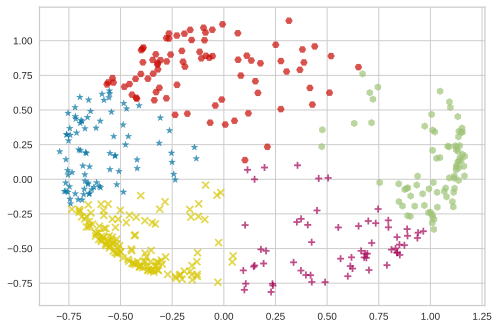

In [38]:
for cluster in np.unique(clusters):
  cluster_data = res_kpca[clusters==cluster]
  plt.scatter(
      cluster_data[:,0],
      cluster_data[:,1],
      alpha = 0.7,
      marker = markers[cluster]

  )

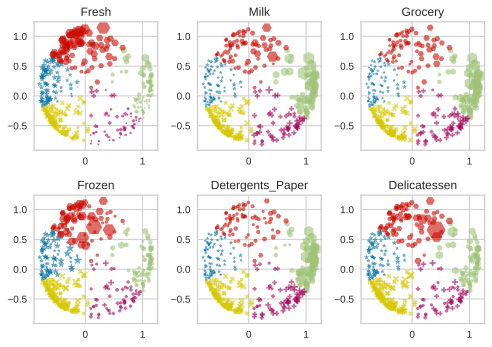

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))

for feature, ax in zip(features[2:], axes.ravel()):
    cmap = 'viridis'
    for cluster in np.unique(clusters):
        cluster_data = res_kpca[clusters==cluster]
        sizes = 20+20*data[:,(features.index(feature)-2)][clusters==cluster]
        ax.scatter(
            cluster_data[:,0],
            cluster_data[:,1],
            s = sizes,
            alpha = 0.6,
            cmap = cmap,
            marker = markers[cluster]
        )
    ax.set_title(feature)
plt.tight_layout()

In [40]:
customers_df['cluster_kpca_cos'] = clusters

# Elbow Method

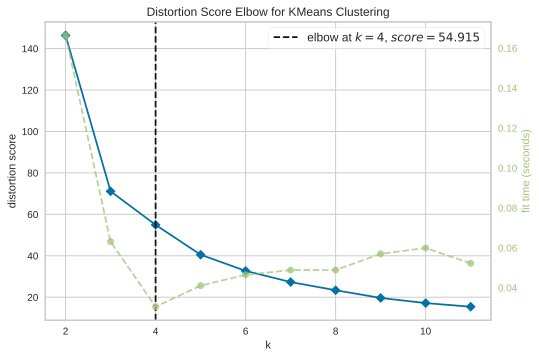

In [41]:
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k = (2, 12), metric= 'distortion')

visualizer.fit(res_kpca)
visualizer.show()

In [42]:
#The silhouette suggests 3 clusters whereas the distortion metric suggests 4 clusters,
#however we will stick to 5 clusters since the client wants to advertise to 5 different types of customers.

# Cluster Distribution

In [43]:
customers_df.groupby(['cluster_kpca_cos','Channel', 'Region'])[features[2:]].mean()

Fresh          Milk       Grocery  \
cluster_kpca_cos Channel Region                                             
0                HoReCa  Lisbon  15022.055556   1949.166667   2459.388889   
                         Other   14973.352941   1907.509804   2390.274510   
                         Porto   12720.846154   1570.076923   3646.076923   
                 Retail  Other   16085.666667   3109.666667   4594.000000   
1                HoReCa  Lisbon   6364.666667  17421.333333  11328.333333   
                         Other   11908.500000  15602.500000  14858.000000   
                 Retail  Lisbon   4302.166667  13440.833333  23713.250000   
                         Other    9260.603774  15728.924528  22173.962264   
                         Porto    4998.900000  12905.200000  23565.600000   
2                HoReCa  Lisbon  35193.000000   4892.444444   6189.333333   
                         Other   32018.096154   5519.519231   5693.903846   
                         Porto   29443.000000   7568.666667   8123.333333   
                 Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                         Other   23938.461538   6279.923077   9520.230769   
                         Porto   20117.666667   4662.666667   6631.000000   
3                HoReCa  Lisbon   3218.333333   7438.166667   7476.500000   
                         Other    2835.500000   6629.625000   8714.687500   
                 Retail  Lisbon   2443.333333   6128.333333   9281.333333   
                         Other    4539.060606   6606.030303  10429.969697   
                         Porto    3121.500000   6622.250000  10607.750000   
4                HoReCa  Lisbon   5899.782609   2275.304348   2553.260870   
                         Other    4783.355556   2379.733333   2588.477778   
                         Porto    6042.916667   1783.500000   4275.416667   
                 Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                         Other   10750.000000   3468.666667   6065.333333   
                         Porto    7839.000000   2548.000000   6110.000000   

                                       Frozen  Detergents_Paper  Delicatessen  
cluster_kpca_cos Channel Region                                                
0                HoReCa  Lisbon   3691.166667        341.500000    925.388889  
                         Other    3780.823529        417.392157    806.803922  
                         Porto    5650.307692        428.461538   1125.923077  
                 Retail  Other    1181.666667       1537.000000   1096.333333  
1                HoReCa  Lisbon   5405.000000       2735.000000   3096.333333  
                         Other    3388.000000       2680.500000   3507.000000  
                 Retail  Lisbon   2153.000000      10679.750000   2188.833333  
                         Other    1778.943396       9987.754717   2207.358491  
                         Porto    1106.200000      12201.800000   1326.400000  
2                HoReCa  Lisbon   6391.555556        569.555556   2702.222222  
                         Other    7774.538462        865.076923   3372.961538  
                         Porto   22094.666667        594.333333   2272.666667  
                 Retail  Lisbon   5040.000000       1761.500000   1845.000000  
                         Other    2133.923077       2765.538462   2451.846154  
                         Porto    4582.666667       2368.333333   2543.333333  
3                HoReCa  Lisbon   1071.666667       2718.500000    960.000000  
                         Other    1316.000000       2991.125000   1075.000000  
                 Retail  Lisbon   1662.000000       5195.666667    793.000000  
                         Other     909.454545       4387.848485   1169.393939  
                         Porto     647.250000       6188.000000    465.500000  
4                HoReCa  Lisbon   1647.913043        882.260870    635.043478  
                         Other    1629.7333

In [44]:
customers_df.groupby('cluster_kpca_cos').count()

Channel  Region  Fresh  Milk  Grocery  Frozen  \
cluster_kpca_cos                                                  
0                      85      85     85    85       85      85   
1                      80      80     80    80       80      80   
2                      82      82     82    82       82      82   
3                      62      62     62    62       62      62   
4                     131     131    131   131      131     131   

                  Detergents_Paper  Delicatessen  x_kpca_poly  y_kpca_poly  \
cluster_kpca_cos                                                             
0                               85            85           85           85   
1                               80            80           80           80   
2                               82            82           82           82   
3                               62            62           62           62   
4                              131           131          131          131   

                  x_kpca_rbf  y_kpca_rbf  x_kpca_cos  y_kpca_cos  
cluster_kpca_cos                                                  
0                         85          85          85          85  
1                         80          80          80          80  
2                         82          82          82          82  
3                         62          62          62          62  
4                        131         131         131         131

In [45]:
clusters = customers_df.cluster_kpca_cos.tolist()

In [46]:
df_normalized = customers_df.copy(deep=True)
df_normalized[features[2:]] = df_normalized[features[2:]]/df_normalized[features[2:]].max()

In [47]:
df_normalized.head()

Channel Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0  Retail  Other  0.112964  0.131378  0.081494  0.003516          0.065496   
1  Retail  Other  0.062924  0.133473  0.103126  0.028947          0.080657   
2  Retail  Other  0.056647  0.119840  0.082820  0.039511          0.086119   
3  HoReCa  Other  0.118278  0.016273  0.045495  0.105210          0.012418   
4  Retail  Other  0.201648  0.073607  0.077581  0.064318          0.043525   

   Delicatessen  x_kpca_poly  y_kpca_poly  x_kpca_rbf  y_kpca_rbf  x_kpca_cos  \
0      0.027908    -0.298146    -0.307672    0.078374   -0.173115    0.504789   
1      0.037044    -0.272613    -0.248762    0.185813   -0.307415    0.889941   
2      0.163611     0.557870    -0.356102    0.341702    0.075048    0.473994   
3      0.037294    -0.263419    -0.454023   -0.253304    0.250352   -0.618611   
4      0.108149     0.126922    -0.432733    0.136617    0.375279    0.068900   

   y_kpca_cos  cluster_kpca_cos  
0    0.009622                 3  
1   -0.262833                 1  
2    0.235687                 1  
3    0.370131                 0  
4    0.861829                 2

In [48]:
biggest_cluster = customers_df.groupby('cluster_kpca_cos').count().max().max()
biggest_cluster

131

In [58]:
fig = go.Figure()

for cluster in np.unique(clusters):
  radii = df_normalized.loc[df_normalized.cluster_kpca_cos==cluster, 
                            features[2:]].mean().tolist()
  
  thetas = features[2:]

  actual_values = customers_df.loc[customers_df.cluster_kpca_cos==cluster, features[2:]].mean().tolist()
  cluster_size = len(customers_df[customers_df.cluster_kpca_cos==cluster])

  fig.add_trace(
      go.Scatterpolar(
          r = radii + [radii[0]],
          theta = thetas + [thetas[0]],
          mode='lines',
          name=f'Cluster{cluster}',
          text=[f'Mean value: {x}' for x in actual_values + [actual_values[0]]],
          opacity = np.max([0.6, cluster_size/biggest_cluster]),
          line=dict(width=3)
      )
  )

fig.update_layout(
    title = 'Cluster Analysis',
    template = 'plotly_dark',
    width = 600,
    autosize = False


)
fig.show()